# Data obtained on Kaggle competition:
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

## Librerias y carga del dataset desde drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Universidad/9Noveno/Modelos computacionales/cardiovascular-disease-dataset.csv", sep=";")
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
dataset.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## EDA

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


- No se tienen datos faltantes, 12 de las columnas tienen datos tipo int y 1 tipo float

In [ ]:
dataset = dataset.astype(float)
dataset.drop('id', axis = 1, inplace = True)

In [ ]:
#Feature engineering
dataset["IMC"] = dataset["weight"] / (dataset["height"]/100)**2 #Añadir IMC
dataset["ap_mid"] = (dataset["ap_hi"]+(2*dataset["ap_lo"]))/3 #Añadir presión arterial media
dataset["age"] = (dataset["age"]/365).astype(int)
dataset.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,ap_mid
0,50,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,21.967120,90.000000
1,55,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,34.927679,106.666667
2,51,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,23.507805,90.000000
3,48,2.0,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,28.710479,116.666667
4,47,1.0,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,23.011177,73.333333


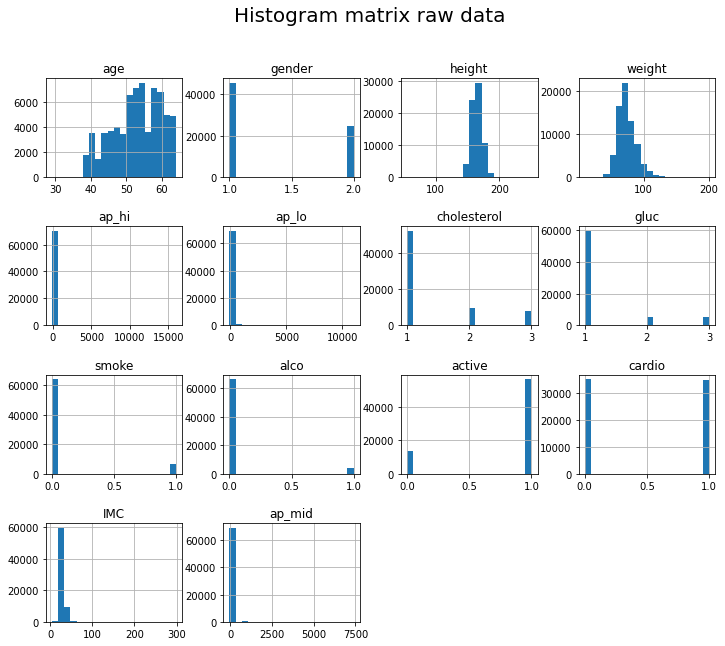

In [ ]:
dataset.hist(bins=20, figsize=(12,10))
plt.suptitle('Histogram matrix raw data', fontsize = 20)
plt.subplots_adjust(hspace = 0.5)
plt.show()

## Prepare data

In [ ]:
#first Filter
ap_filter = ((dataset["ap_hi"]>210) | (dataset["ap_lo"]>130) | (dataset["ap_hi"]<30) | (dataset["ap_lo"]<40))
age_filter = (dataset["age"]<35)
IMC_filter = (dataset['IMC']>80)

dataset = dataset[~ap_filter]
dataset = dataset[~age_filter]
dataset = dataset[~IMC_filter]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
#New info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68654 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68654 non-null  int64  
 1   gender       68654 non-null  float64
 2   height       68654 non-null  float64
 3   weight       68654 non-null  float64
 4   ap_hi        68654 non-null  float64
 5   ap_lo        68654 non-null  float64
 6   cholesterol  68654 non-null  float64
 7   gluc         68654 non-null  float64
 8   smoke        68654 non-null  float64
 9   alco         68654 non-null  float64
 10  active       68654 non-null  float64
 11  cardio       68654 non-null  float64
 12  IMC          68654 non-null  float64
 13  ap_mid       68654 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 7.9 MB


In [ ]:
corr_matrix = dataset.corr() # correlation function 
corr_matrix.style.background_gradient(cmap='coolwarm')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,ap_mid
age,1.000000,-0.023476,-0.084174,0.054521,0.209494,0.154776,0.154875,0.098650,-0.047895,-0.029166,-0.010446,0.239293,0.100753,0.194807
gender,-0.023476,1.000000,0.511882,0.157174,0.060941,0.067415,-0.036691,-0.021036,0.338901,0.171417,0.005528,0.007069,-0.109069,0.069531
height,-0.084174,0.511882,1.000000,0.306435,0.018819,0.037352,-0.052980,-0.020467,0.193517,0.097859,-0.009304,-0.011629,-0.217960,0.030969
weight,0.054521,0.157174,0.306435,1.000000,0.269137,0.251634,0.140939,0.106762,0.066827,0.067986,-0.017794,0.179580,0.855176,0.280595
ap_hi,0.209494,0.060941,0.018819,0.269137,1.000000,0.713735,0.194252,0.092880,0.026810,0.033211,-0.001037,0.428557,0.263528,0.915491
ap_lo,0.154776,0.067415,0.037352,0.251634,0.713735,1.000000,0.159799,0.074010,0.025029,0.039294,-0.000838,0.338511,0.236429,0.935222
cholesterol,0.154875,-0.036691,-0.052980,0.140939,0.194252,0.159799,1.000000,0.450852,0.009977,0.035190,0.008891,0.221425,0.169414,0.189987
gluc,0.098650,-0.021036,-0.020467,0.106762,0.092880,0.074010,0.450852,1.000000,-0.005714,0.010440,-0.007864,0.089674,0.118236,0.089464
smoke,-0.047895,0.338901,0.193517,0.066827,0.026810,0.025029,0.009977,-0.005714,1.000000,0.340476,0.025223,-0.016470,-0.033938,0.027930
alco,-0.029166,0.171417,0.097859,0.067986,0.033211,0.039294,0.035190,0.010440,0.340476,1.000000,0.024612,-0.008770,0.016943,0.039360


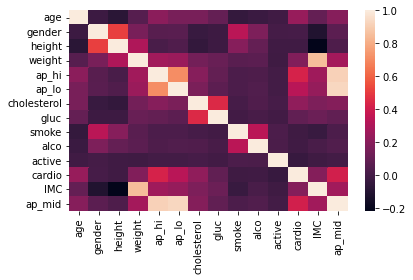

In [ ]:
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix["cardio"].sort_values(ascending=False) # Sort correlations from feature to predict

cardio         1.000000
ap_hi          0.428557
ap_mid         0.411086
ap_lo          0.338511
age            0.239293
cholesterol    0.221425
IMC            0.188265
weight         0.179580
gluc           0.089674
gender         0.007069
alco          -0.008770
height        -0.011629
smoke         -0.016470
active        -0.037457
Name: cardio, dtype: float64

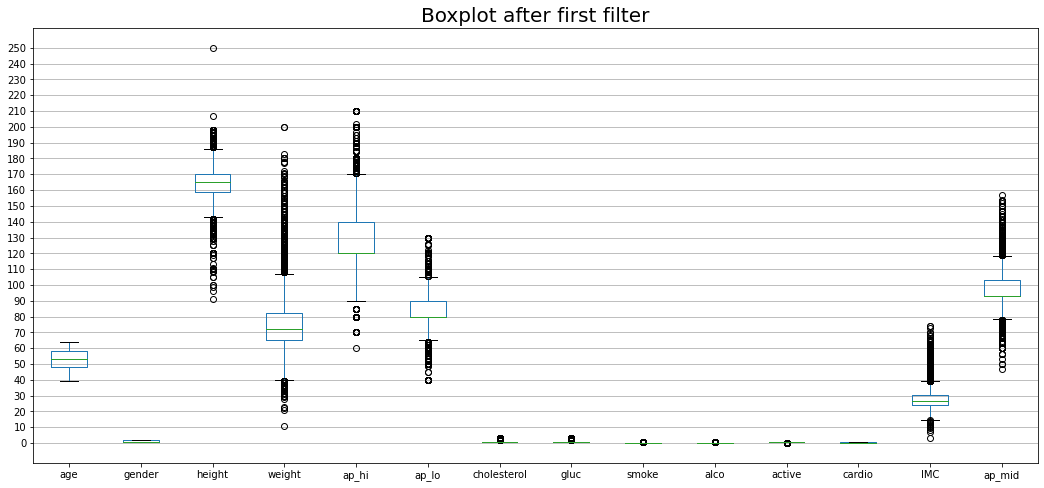

In [ ]:
plt.figure(figsize=(18,8))
dataset.boxplot()
plt.grid(axis = 'x')
plt.yticks(np.arange(0,max(dataset.max())+10,10))
plt.title('Boxplot after first filter', fontsize = 20)
plt.show()

In [ ]:
dataset_copy = dataset.copy()

In [ ]:
# Deletting outliers
height_filter = (dataset_copy["height"]>200)
weight_filter = (dataset_copy["weight"]>175)

dataset_copy = dataset_copy[~height_filter]
dataset_copy = dataset_copy[~weight_filter]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
corr_matrix = dataset_copy.corr() # correlation function 
corr_matrix.style.background_gradient(cmap='coolwarm')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,ap_mid
age,1.000000,-0.023399,-0.084194,0.055391,0.209585,0.154798,0.154898,0.098628,-0.047947,-0.029258,-0.010456,0.239368,0.101451,0.194866
gender,-0.023399,1.000000,0.512390,0.156619,0.060948,0.067383,-0.036782,-0.021075,0.338962,0.171285,0.005414,0.006989,-0.110309,0.069515
height,-0.084194,0.512390,1.000000,0.305893,0.018731,0.037134,-0.053659,-0.020478,0.193960,0.097679,-0.009470,-0.011924,-0.219674,0.030799
weight,0.055391,0.156619,0.305893,1.000000,0.269998,0.252430,0.141025,0.107105,0.067100,0.067591,-0.018111,0.179917,0.854688,0.281486
ap_hi,0.209585,0.060948,0.018731,0.269998,1.000000,0.713744,0.194263,0.092936,0.026843,0.033427,-0.001043,0.428530,0.263999,0.915497
ap_lo,0.154798,0.067383,0.037134,0.252430,0.713744,1.000000,0.159718,0.074055,0.025057,0.039421,-0.000908,0.338442,0.236854,0.935222
cholesterol,0.154898,-0.036782,-0.053659,0.141025,0.194263,0.159718,1.000000,0.450874,0.010039,0.035148,0.008824,0.221324,0.169679,0.189946
gluc,0.098628,-0.021075,-0.020478,0.107105,0.092936,0.074055,0.450874,1.000000,-0.005692,0.010297,-0.007883,0.089637,0.118456,0.089519
smoke,-0.047947,0.338962,0.193960,0.067100,0.026843,0.025057,0.010039,-0.005692,1.000000,0.340468,0.025217,-0.016403,-0.034159,0.027962
alco,-0.029258,0.171285,0.097679,0.067591,0.033427,0.039421,0.035148,0.010297,0.340468,1.000000,0.024538,-0.008697,0.016463,0.039542


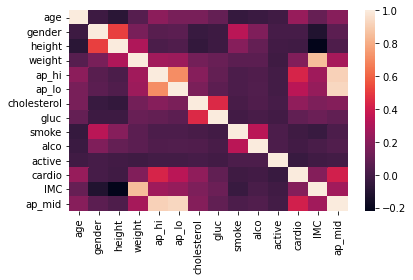

In [ ]:
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix["cardio"].sort_values(ascending=False) # Sort correlations from feature to predict

cardio         1.000000
ap_hi          0.428530
ap_mid         0.411033
ap_lo          0.338442
age            0.239368
cholesterol    0.221324
IMC            0.188518
weight         0.179917
gluc           0.089637
gender         0.006989
alco          -0.008697
height        -0.011924
smoke         -0.016403
active        -0.037528
Name: cardio, dtype: float64

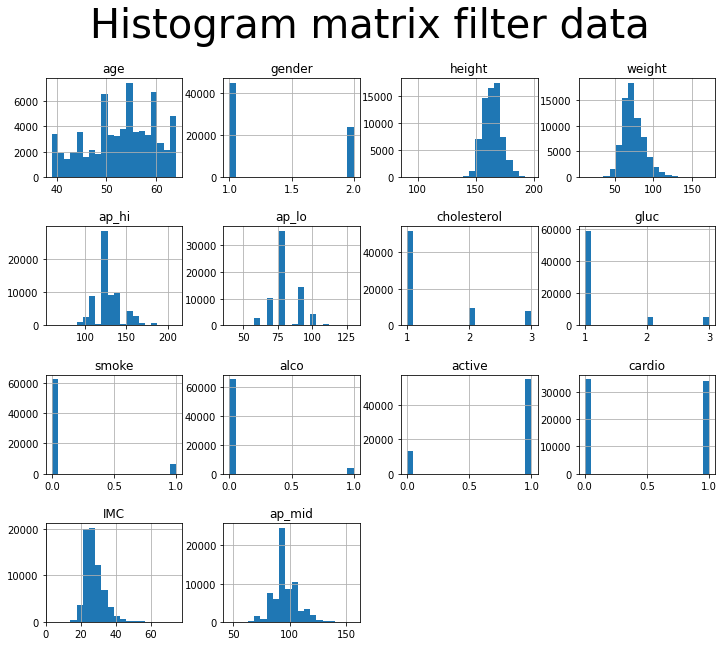

In [ ]:
dataset_copy.hist(bins=20, figsize=(12,10))
plt.suptitle('Histogram matrix filter data', fontsize = 40)
plt.subplots_adjust(hspace = 0.5)
plt.show()

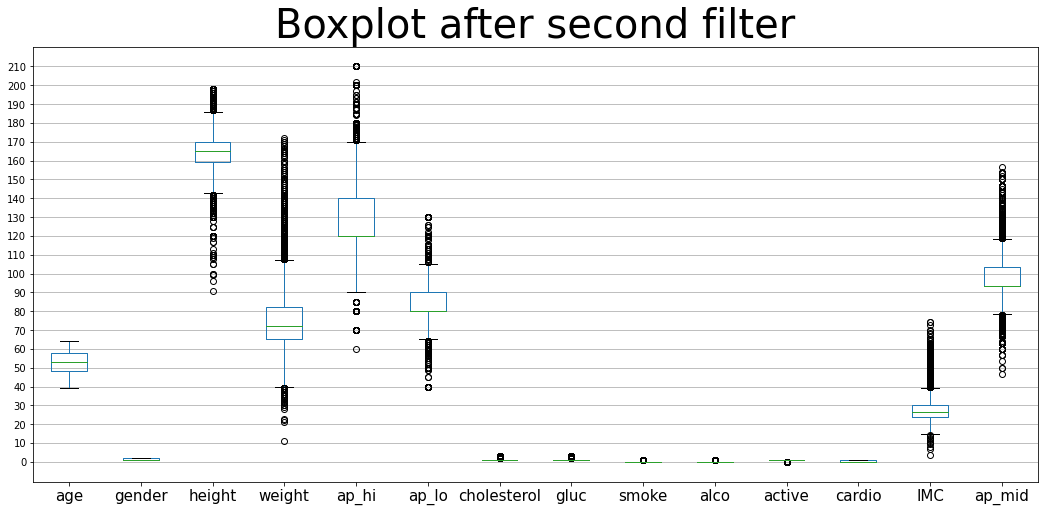

In [ ]:
plt.figure(figsize=(18,8))
dataset_copy.boxplot()
plt.grid(axis = 'x')
plt.yticks(np.arange(0,max(dataset_copy.max())+10,10))
plt.title('Boxplot after second filter', fontsize = 40)
plt.xticks(fontsize = 15)
plt.show()

In [ ]:
dataset_copy.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC,ap_mid
count,68642.000000,68642.000000,68642.000000,68642.000000,68642.000000,68642.000000,68642.000000,68642.000000,68642.000000,68642.000000,68642.000000,68642.000000,68642.000000,68642.000000
mean,52.828618,1.348548,164.393316,74.082572,126.568063,81.307071,1.364325,1.225707,0.087993,0.053451,0.803327,0.494449,27.456721,96.394069
std,6.767776,0.476514,7.969465,14.220646,16.585447,9.423101,0.678664,0.571642,0.283286,0.224933,0.397486,0.499973,5.255625,10.936434
min,39.000000,1.000000,91.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784,46.666667
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,93.333333
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494,93.333333
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.116213,103.333333
max,64.000000,2.000000,198.000000,172.000000,210.000000,130.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,74.380165,156.666667


## Models

In [ ]:
y = dataset_copy['cardio']
X = dataset_copy.drop(['cardio'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0) 

In [ ]:
print(X_train.shape,X_test.shape)

(58345, 13) (10297, 13)


In [ ]:
print(y_train.shape,y_test.shape)

(58345,) (10297,)


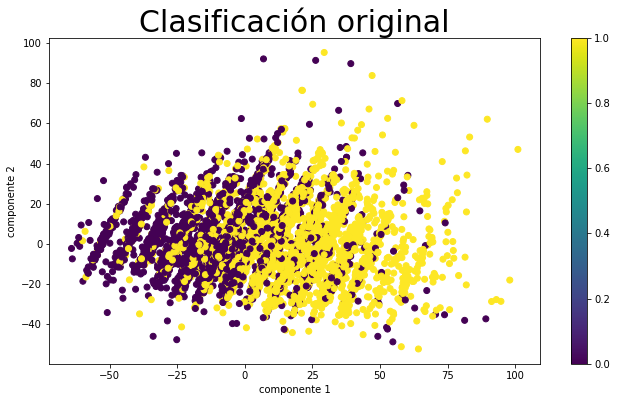

In [ ]:
#Visualizar datos de entrenamiento
#https://github.com/amalvarezme/AnaliticaDatos/blob/master/4_NoSupervisado/2_ReduccionDimension.ipynb

test_pca = PCA(n_components=2).fit_transform(X_test)

plt.figure(figsize=(11,6))
plt.scatter(test_pca[:,0],test_pca[:,1],c=y_test)
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('Clasificación original', fontsize = 30)
plt.colorbar()
plt.show()

### Random Forest classifier

In [ ]:
RFC_clf = RandomForestClassifier(random_state=42)

cross_val_score(RFC_clf, X_train, y_train, scoring="accuracy",n_jobs = -1, cv=3)

array([0.70708006, 0.70876183, 0.70613945])

In [ ]:
RFC_clf.fit(X_train, y_train)
acc_random_forest = round(RFC_clf.score(X_train, y_train) * 100, 2)
print('Train accuracy:',acc_random_forest,'%')

Train accuracy: 97.88 %


In [ ]:
acc_test_random_forest = round(RFC_clf.score(X_test, y_test) * 100, 2)
print('Test accuracy:', acc_test_random_forest,'%')

Test accuracy: 71.12 %


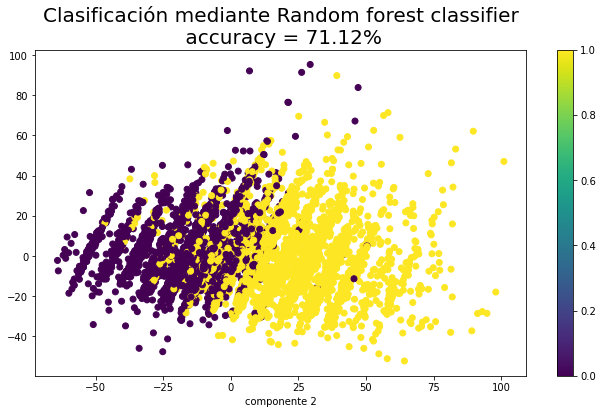

In [ ]:
RFC_pca = PCA(n_components=2).fit_transform(X_test)
y_predRFC = RFC_clf.predict(X_test)

plt.figure(figsize=(11,6))
plt.scatter(RFC_pca[:,0],RFC_pca[:,1],c=y_predRFC)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Clasificación mediante Random forest classifier\n accuracy = {}%'.format(acc_test_random_forest), fontsize = 20)
plt.colorbar()
plt.show()

### Support Vector Classifier

#### SVC

In [ ]:
svc = SVC()

cross_val_score(svc, X_train, y_train, scoring="accuracy",n_jobs = -1, cv=3)

array([0.71957427, 0.72439325, 0.71698889])

In [ ]:
svc.fit(X_train, y_train)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print('Train accuracy:',acc_svc,'%')

Train accuracy: 72.29 %


In [ ]:
acc_test_svc = round(svc.score(X_test, y_test) * 100, 2)
print('Train accuracy:',acc_test_svc,'%')

Train accuracy: 71.97 %


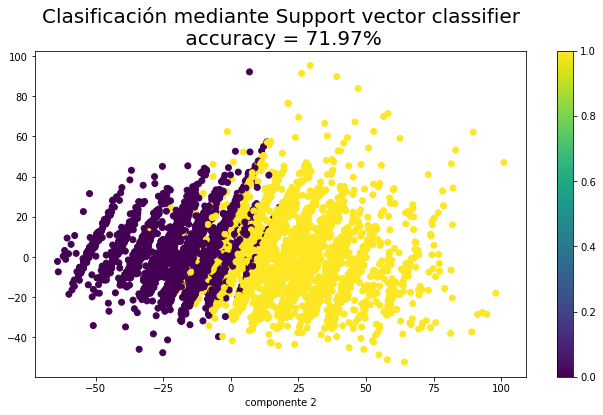

In [ ]:
SVC_pca = PCA(n_components=2).fit_transform(X_test)
y_predSVC = svc.predict(X_test)

plt.figure(figsize=(11,6))
plt.scatter(SVC_pca[:,0],SVC_pca[:,1],c=y_predSVC)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Clasificación mediante Support vector classifier\n accuracy = {}%'.format(acc_test_svc), fontsize = 20)
plt.colorbar()
plt.show()

#### Linear SVC

In [ ]:
svc_clf1 = LinearSVC(loss="hinge", C = 10, random_state=42)

cross_val_score(svc_clf1, X_train, y_train, scoring="accuracy",n_jobs = -1, cv=3)

array([0.54028485, 0.65893665, 0.71724599])

In [ ]:
svc_clf1.fit(X_train, y_train)
acc_svc1 = round(svc_clf1.score(X_train, y_train) * 100, 2)
print('Train accuracy:',acc_svc1,'%')

Train accuracy: 62.7 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
acc_test_svc1 = round(svc_clf1.score(X_test, y_test) * 100, 2)
print('Test accuracy:',acc_test_svc1,'%')

Test accuracy: 62.87 %


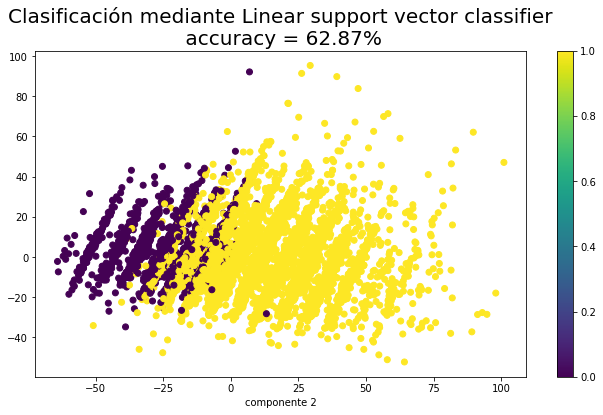

In [ ]:
SVC1_pca = PCA(n_components=2).fit_transform(X_test)
y_predSVC1 = svc_clf1.predict(X_test)

plt.figure(figsize=(11,6))
plt.scatter(SVC1_pca[:,0],SVC1_pca[:,1],c=y_predSVC1)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Clasificación mediante Linear support vector classifier\n accuracy = {}%'.format(acc_test_svc1), fontsize = 20)
plt.colorbar()
plt.show()

#### SVC Kernel polinomial 

In [ ]:
svc_clf2 = SVC(kernel="poly", degree=3, coef0=1, C=5)

cross_val_score(svc_clf2, X_train, y_train, scoring="accuracy",n_jobs = -1, cv=3)

array([0.72646409, 0.73287742, 0.72768408])

In [ ]:
svc_clf2.fit(X_train, y_train)
acc_svc2 = round(svc_clf2.score(X_train, y_train) * 100, 2)
print('Train accuracy:',acc_svc2,'%')

Train accuracy: 72.98 %


In [ ]:
acc_test_svc2 = round(svc_clf2.score(X_test, y_test) * 100, 2)
print('Test accuracy:',acc_test_svc2,'%')

Test accuracy: 72.77 %


In [ ]:
SVC2_pca = PCA(n_components=2).fit_transform(X_test)
y_predSVC2 = svc_clf2.predict(X_test)

plt.figure(figsize=(11,6))
plt.scatter(SVC2_pca[:,0],SVC2_pca[:,1],c=y_predSVC2)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Clasificación mediante Polynomial kernel SVC \n accuracy = {}%'.format(acc_test_svc2), fontsize = 20)
plt.colorbar()
plt.show()

### SGD Classifier

In [ ]:
sgd_clf = SGDClassifier(random_state=42) 

cross_val_score(sgd_clf, X_train, y_train, scoring="accuracy",n_jobs = -1, cv=3)

In [ ]:
sgd_clf.fit(X_train,y_train)
acc_sgd = round(sgd_clf.score(X_train, y_train) * 100, 2)
print('Train accuracy:',acc_sgd,'%')

In [ ]:
acc_test_sgd = round(sgd_clf.score(X_test, y_test) * 100, 2)
print('Test accuracy:',acc_test_sgd,'%')

In [ ]:
SGD_pca = PCA(n_components=2).fit_transform(X_test)
y_predSGD = sgd_clf.predict(X_test)

plt.figure(figsize=(11,6))
plt.scatter(SGD_pca[:,0],SGD_pca[:,1],c=y_predSGD)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Clasificación mediante Stochastic gradient descent classifier\n accuracy = {}%'.format(acc_test_sgd), fontsize = 20)
plt.colorbar()
plt.show()

### K neighbors classifier

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 3)

cross_val_score(knn_clf, X_train, y_train, scoring="accuracy",n_jobs = -1, cv=3)

In [ ]:
knn_clf.fit(X_train,y_train)
acc_knn = round(knn_clf.score(X_train, y_train) * 100, 2)
print('Train accuracy:',acc_knn,'%')

Train accuracy: 81.52 %


In [ ]:
acc_test_knn = round(knn_clf.score(X_test, y_test) * 100, 2)
print('Test accuracy:',acc_test_knn,'%')

Test accuracy: 67.41 %


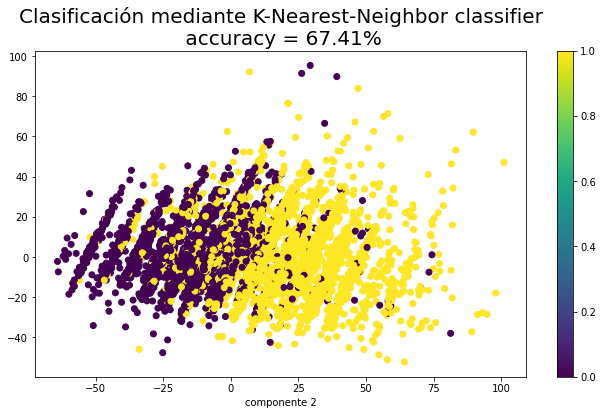

In [ ]:
KNN_pca = PCA(n_components=2).fit_transform(X_test)
y_predKNN = knn_clf.predict(X_test)

plt.figure(figsize=(11,6))
plt.scatter(KNN_pca[:,0],KNN_pca[:,1],c=y_predKNN)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Clasificación mediante K-Nearest-Neighbor classifier\n accuracy = {}%'.format(acc_test_knn), fontsize = 20)
plt.colorbar()
plt.show()

## Compare models

In [ ]:
models = pd.DataFrame({
    'Model': ['Random Forest classifier', 'Support Vector classifier', 'Linear SVC',
              'Polynomial kernel SVC','Stochastic Gradient Decent','k-Nearest Neighbors'],
    
    'Score_train': [acc_random_forest, acc_svc, acc_svc1, acc_svc2, acc_sgd, acc_knn],
    'Score_test': [acc_test_random_forest, acc_test_svc, acc_test_svc1, acc_test_svc2,
                   acc_test_sgd, acc_test_knn]
                    })

In [ ]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])

In [ ]:
models

,Model,Score_train,Score_test,Score_diff
0,Random Forest classifier,97.88,71.12,26.76
1,Support Vector classifier,72.29,71.97,0.32
2,Linear SVC,62.70,62.87,0.17
3,Polynomial kernel SVC,72.98,72.77,0.21
4,Stochastic Gradient Decent,64.58,64.83,0.25
5,k-Nearest Neighbors,81.52,67.41,14.11


In [ ]:
list(models['Model'])

['Random Forest classifier',
 'Support Vector classifier',
 'Linear SVC',
 'Polynomial kernel SVC',
 'Stochastic Gradient Decent',
 'k-Nearest Neighbors']

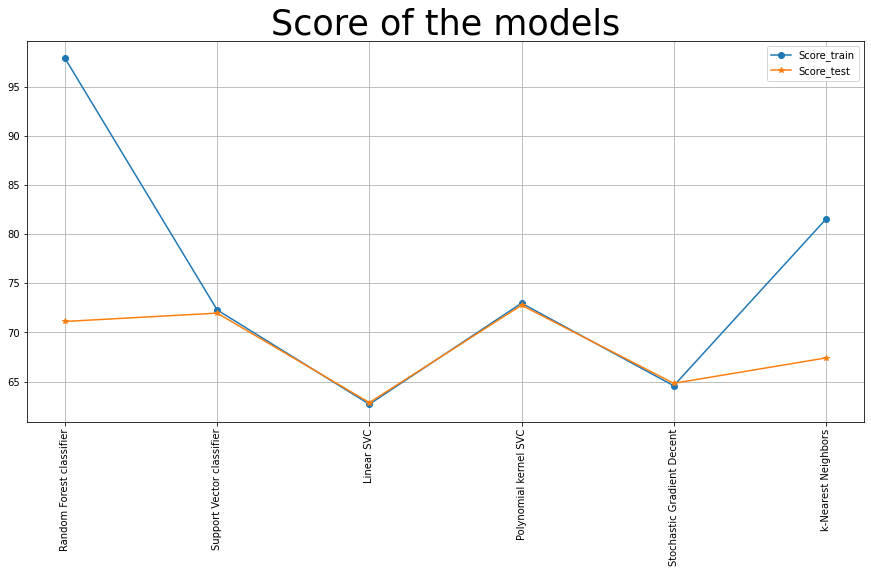

In [ ]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
xx = models['Model']
plt.plot(xx, models['Score_train'], marker = 'o', label = 'Score_train')
plt.plot(xx, models['Score_test'], marker = '*', label = 'Score_test')
plt.title('Score of the models', fontsize = 35)
plt.legend()
plt.grid()
plt.show()